# 1. Raw Matrix Chart

This notebook show the raw matrix normalized by column and the interval range of the tests


In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.preprocessing import MinMaxScaler

sns.set_theme(context='paper', style='white')

# Current work
print(os.getcwd())
# Change directory 2 level up
os.chdir("..")
os.chdir("..")
os.chdir("..")

print(os.getcwd())
# Look for the file in the directory
print(os.listdir())

/tmp/ipykernel_10712/2039416977.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


/home/jose/Git/SE-AP/experiments/experiment_1/notebooks
/home/jose/Git/SE-AP
['models', 'todo.md', '.pre-commit-config.yaml', 'demos', '.gitignore', 'experiments', 'include', '.git', '.env', 'README.md', '.env-example', 'LICENSE', 'model_technique_pathology_scores.csv']


### Experiment configuration

In [2]:
model ="llama"
temperature = 0.9
prompt_technique = "react"

Show how the data is structured

In [3]:
df = pd.read_csv(f'experiments/experiment_1/results/{model}/scores_{prompt_technique}_{model}_{temperature}.csv')
df[df['Iteration'] == 1]

,Depression,Trait Anxiety,Eating Disorder,Alcohol Addiction,Impulsivity,Schizophrenia,Obsessive Compulsive Disorder,Apathy,Social Anxiety,Induced Pathology,Iteration
0,0.450000,0.350000,0.243590,0.250,0.500000,0.581395,0.216667,0.277778,0.513889,No Pathology,1
1,0.500000,0.550000,0.320513,0.600,0.533333,0.674419,0.616667,0.185185,0.652778,Depression,1
2,0.566667,0.533333,0.358974,0.425,0.566667,0.697674,0.716667,0.185185,0.645833,Trait Anxiety,1
3,0.566667,0.583333,0.205128,0.475,0.533333,0.744186,0.633333,0.185185,0.687500,Eating Disorder,1
4,0.433333,0.550000,0.269231,0.800,0.555556,0.744186,0.666667,0.166667,0.687500,Alcohol Addiction,1
5,0.533333,0.566667,0.282051,0.375,0.555556,0.627907,0.416667,0.351852,0.680556,Impulsivity,1
6,0.516667,0.550000,0.243590,0.600,0.566667,0.465116,0.600000,0.296296,0.666667,Schizophrenia,1
7,0.533333,0.550000,0.358974,0.475,0.566667,0.511628,0.583333,0.203704,0.631944,Obsessive Compulsive Disorder,1
8,0.483333,0.516667,0.128205,0.525,0.555556,0.325581,0.666667,0.296296,0.777778,Apathy,1
9,0.450000,0.550000,0.230769,0.425,0.566667,0.697674,0.733333,0.185185,0.729167,Social Anxiety,1


In [4]:
df = df.drop(columns=['Iteration'])

We group by 'Induced Pathology' and calculate the mean and standard deviation

In [5]:
stats = df.groupby('Induced Pathology').agg(['mean', 'std'])
stats

Depression           Trait Anxiety            \
                                    mean       std          mean       std   
Induced Pathology                                                            
Alcohol Addiction               0.486833  0.045090      0.551333  0.008762   
Apathy                          0.490667  0.024311      0.544000  0.025680   
Depression                      0.488333  0.027575      0.548167  0.008507   
Eating Disorder                 0.498333  0.080351      0.549167  0.018709   
Impulsivity                     0.524667  0.029252      0.569167  0.046984   
No Pathology                    0.462500  0.036956      0.357667  0.045407   
Obsessive Compulsive Disorder   0.496833  0.042290      0.544500  0.022103   
Schizophrenia                   0.482833  0.043258      0.557500  0.016979   
Social Anxiety                  0.507500  0.035720      0.549333  0.003282   
Trait Anxiety                   0.524000  0.038367      0.555167  0.016188   

                              Eating Disorder           Alcohol Addiction  \
                                         mean       std              mean   
Induced Pathology                                                           
Alcohol Addiction                    0.246154  0.052656           0.74350   
Apathy                               0.152436  0.041107           0.47250   
Depression                           0.235000  0.051895           0.58250   
Eating Disorder                      0.307692  0.068449           0.46250   
Impulsivity                          0.260256  0.041252           0.42875   
No Pathology                         0.242564  0.063822           0.28775   
Obsessive Compulsive Disorder        0.320128  0.070961           0.43825   
Schizophrenia                        0.221410  0.050494           0.60050   
Social Anxiety                       0.258974  0.057045           0.43025   
Trait Anxiety                        0.360641  0.049357           0.45550   

                                        Impulsivity           Schizophrenia  \
                                    std        mean       std          mean   
Induced Pathology                                                             
Alcohol Addiction              0.061712    0.560444  0.016053      0.738372   
Apathy                         0.068026    0.560444  0.018707      0.362791   
Depression                     0.068026    0.551111  0.016936      0.505814   
Eating Disorder                0.062006    0.555889  0.018583      0.668372   
Impulsivity                    0.065267    0.556556  0.003899      0.679302   
No Pathology                   0.089998    0.528111  0.020436      0.527442   
Obsessive Compulsive Disorder  0.056122    0.561667  0.017037      0.550233   
Schizophrenia                  0.060509    0.535778  0.026735      0.565349   
Social Anxiety                 0.050789    0.566222  0.015628      0.697442   
Trait Anxiety                  0.073648    0.553333  0.006884      0.704651   

                                        Obsessive Compulsive Disorder  \
                                    std                          mean   
Induced Pathology                                                       
Alcohol Addiction              0.056034                      0.685500   
Apathy                         0.062016                      0.589500   
Depression                     0.099294                      0.641167   
Eating Disorder                0.068910                      0.594333   
Impulsivity                    0.063864                      0.425500   
No Pathology                   0.057240                      0.235167   
Obsessive Compulsive Disorder  0.069037                      0.639000   
Schizophrenia                  0.071024                      0.601667   
Social Anxiety                 0.047499                      0.711833   
Trait Anxiety                  0.068183                      0.637500   

                                   

### Chart script

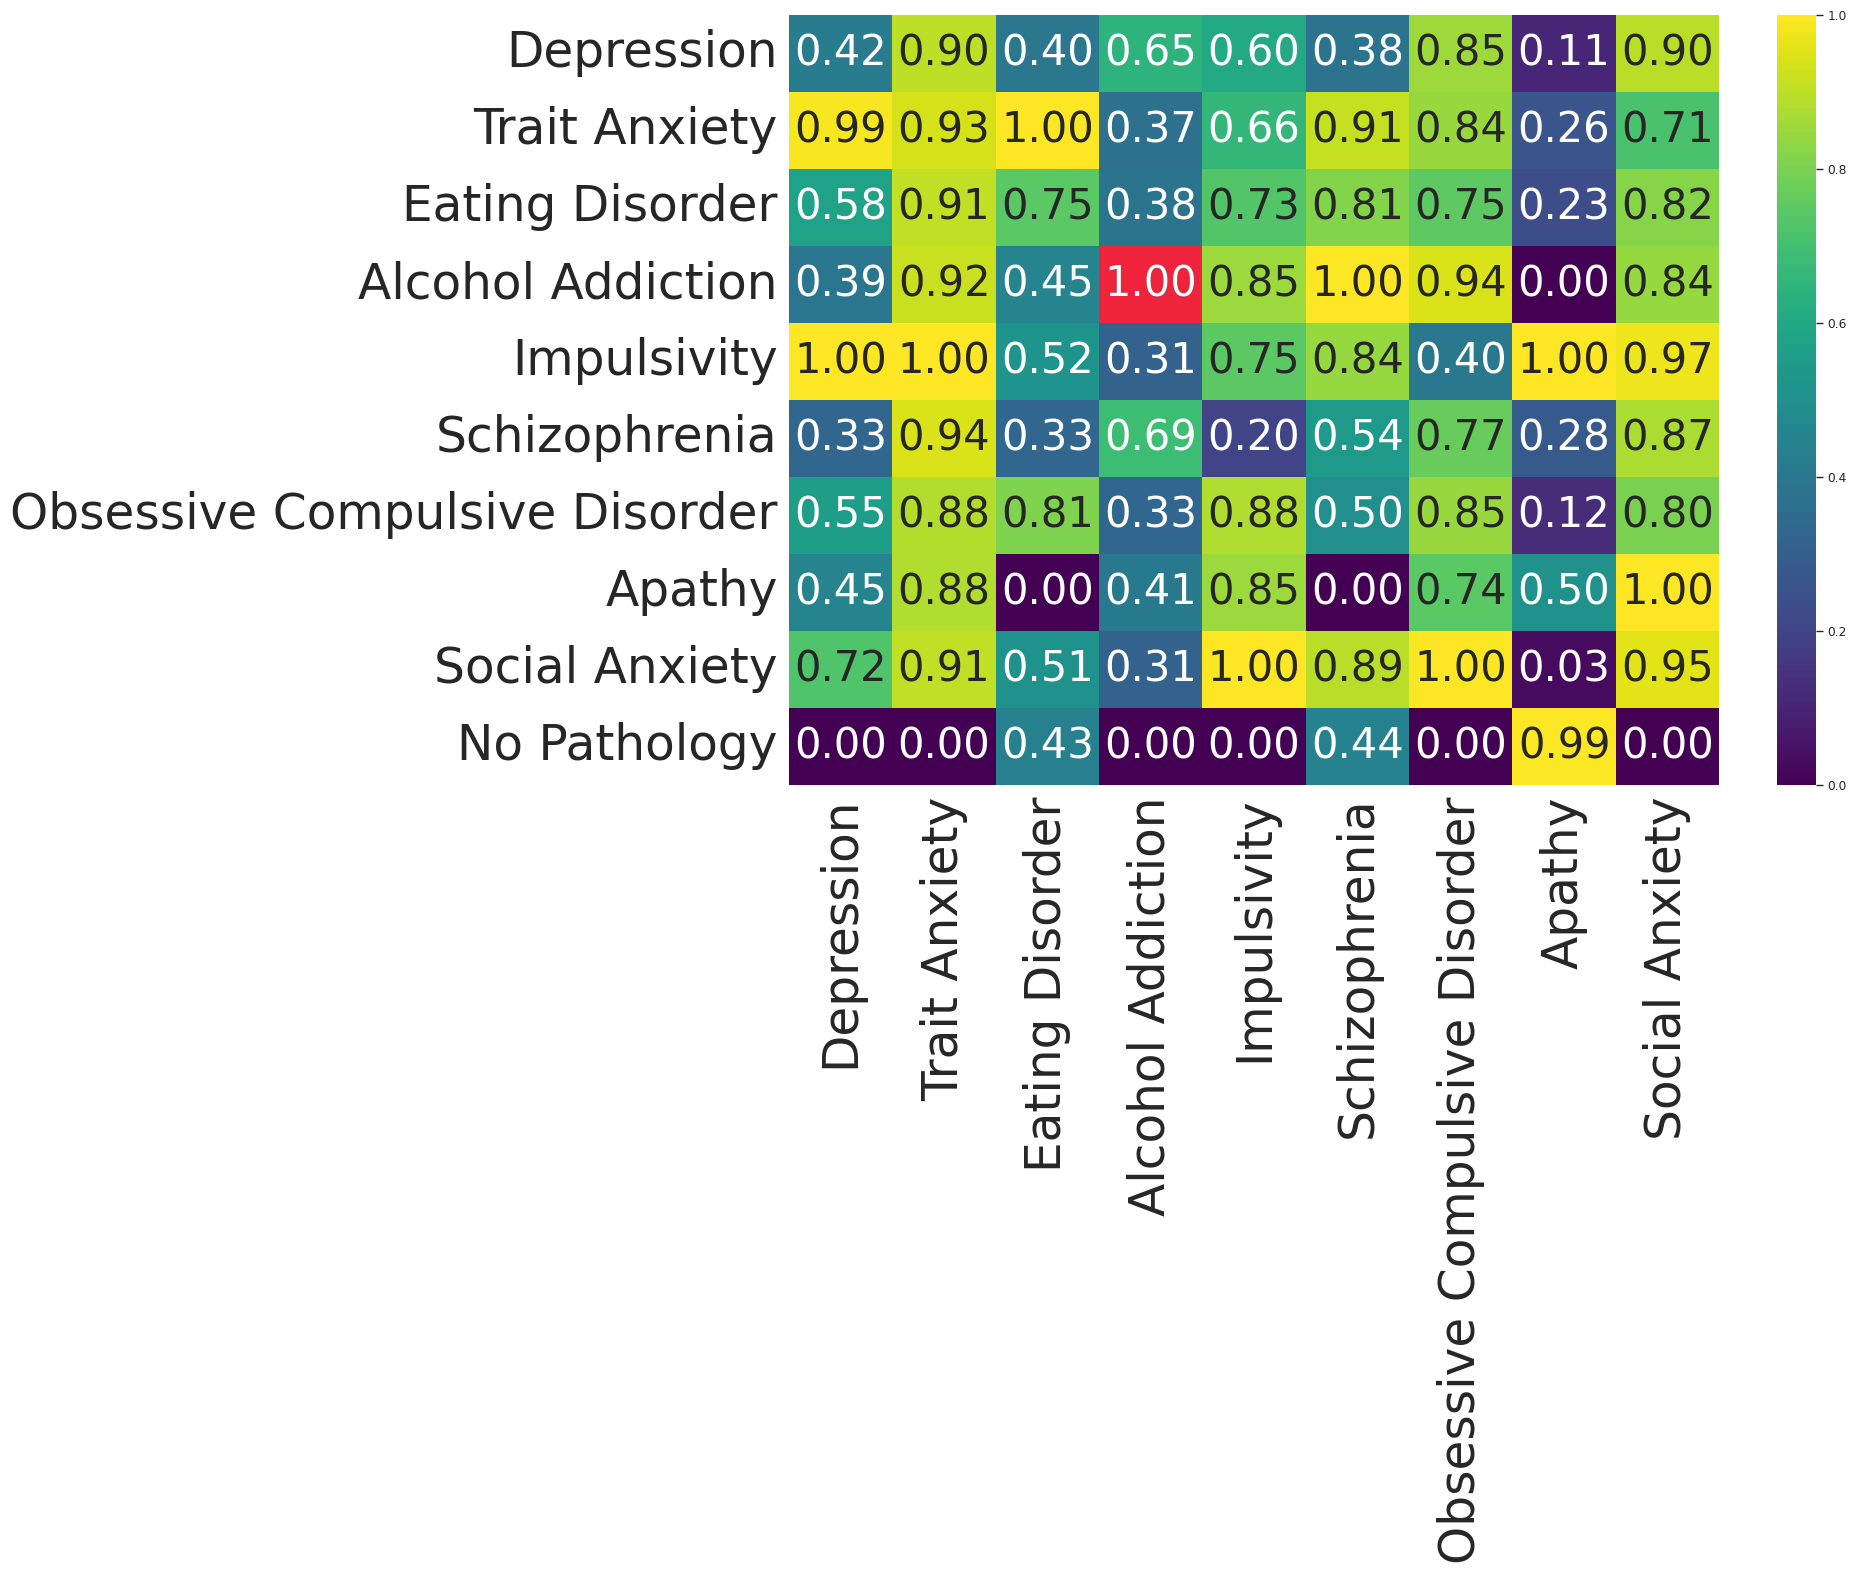

In [6]:
no_pathology_stats = stats.loc[['No Pathology']]

stats_wo_np = stats.drop('No Pathology')

desired_order = [
    'Depression', 'Trait Anxiety', 'Eating Disorder', 'Alcohol Addiction', 
    'Impulsivity', 'Schizophrenia', 'Obsessive Compulsive Disorder', 
    'Apathy', 'Social Anxiety'
]

stats_reordered = stats_wo_np.reindex(desired_order)

means = stats_reordered.xs('mean', level=1, axis=1)
stds = stats_reordered.xs('std', level=1, axis=1)
no_path_means = no_pathology_stats.xs('mean', level=1, axis=1)
no_path_stds = no_pathology_stats.xs('std', level=1, axis=1)

means = pd.concat([means, no_path_means])
means.loc['No Pathology'] = no_path_means.values.flatten()
means['No Pathology'] = means.loc['No Pathology']
means = means.drop(columns=['No Pathology'])

stds = pd.concat([stds, no_path_stds])
stds.loc['No Pathology'] = no_path_stds.values.flatten()
stds['No Pathology'] = stds.loc['No Pathology']
stds = stds.drop(columns=['No Pathology'])

if prompt_technique == "chain":
    prompt_technique_m = "Chain"
elif prompt_technique == "naive":
    prompt_technique_m = "Naive"
elif prompt_technique == "react":
    prompt_technique_m = "React"

scaler = MinMaxScaler()

means_normalized = pd.DataFrame(scaler.fit_transform(means), index=means.index, columns=means.columns)
stds_normalized = pd.DataFrame(scaler.fit_transform(stds), index=stds.index, columns=stds.columns)

fontsize_labels = 12

def highlight_max_per_column(data, ax, color_bg='#ef233c', color_text='white'):
    dict_patches= {}
    for col in data.columns:
        data[col] = data[col].apply(lambda x: round(x, 2))

        max_val = data[col].max()

        max_rows = data[col] == max_val
        
        for row in max_rows[max_rows].index:
            y, x = data.index.get_loc(row), data.columns.get_loc(col)

            if x == y:
                dict_patches[col] = x
                ax.add_patch(Rectangle((x, y), 1, 1, fill=True, color=color_bg, edgecolor=None, linewidth=0))
                
                text_val = f"{data.loc[row, col]:.2f}"
                ax.text(x + 0.5, y + 0.5, text_val, ha='center', va='center', color=color_text, fontsize=30)
    #uncomment to see the patched that are not in the diagonal
    # print(dict_patches)
    # for col in data.columns:
    #     data[col] = data[col].apply(lambda x: round(x, 2))

    #     max_val = data[col].max()

    #     max_rows = data[col] == max_val
        
    #     for row in max_rows[max_rows].index:
    #         y, x = data.index.get_loc(row), data.columns.get_loc(col)

    #         if x not in dict_patches.values():
    #             dict_patches[col] = x
    #             ax.add_patch(Rectangle((x, y), 1, 1, fill=True, color=color_bg, edgecolor=None, linewidth=0))
                
    #             text_val = f"{data.loc[row, col]:.2f}"
    #             ax.text(x + 0.5, y + 0.5, text_val, ha='center', va='center', color=color_text, fontsize=12)
        
    return ax                

plt.figure(figsize=(15, 10))
ax_means = sns.heatmap(means_normalized, annot=True, fmt=".2f", cmap="viridis", square=False, annot_kws={"size": 30})
highlight_max_per_column(means_normalized, ax_means)
plt.title(f"", fontsize=16)
plt.ylabel('', fontsize=15)
plt.xlabel('', fontsize=15)
ax_means.set_xticklabels(ax_means.get_xticklabels(), fontsize=35, rotation=90)
ax_means.set_yticklabels(ax_means.get_yticklabels(), fontsize=35, rotation=0)
plt.show()


# plt.figure(figsize=(15, 10))
# ax_std = sns.heatmap(stds_normalized, annot=True, fmt=".2f", cmap="viridis", square=True, annot_kws={"size": 12})
# highlight_max_per_column(stds_normalized, ax_std)
# plt.title(f"Normalized Raw Values", fontsize=16)
# plt.ylabel('Induced Pathology', fontsize=15)
# plt.xlabel('Pathology Scored', fontsize=15)
# ax_std.set_xticklabels(ax_std.get_xticklabels(), fontsize=14)
# ax_std.set_yticklabels(ax_std.get_yticklabels(), fontsize=14, rotation=0)
# plt.show()